In [220]:
import pandas as pd
import numpy as np

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scikitplot as skplt
%matplotlib inline

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


Some cloumn names contained spaces. 
There was an added space in one row of the housing feature.
These were removed in Excell and the file was saved under a new name.

In [187]:
raw_data_no_space = pd.read_csv('bank_full_no_space.csv', sep=',')
raw_data_no_space.shape

(45211, 17)

In [188]:
# stip space from values in housing
raw_data_no_space['housing'] = raw_data_no_space['housing'].str.strip()

In [189]:
data = raw_data_no_space.copy()

In [190]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data EDA

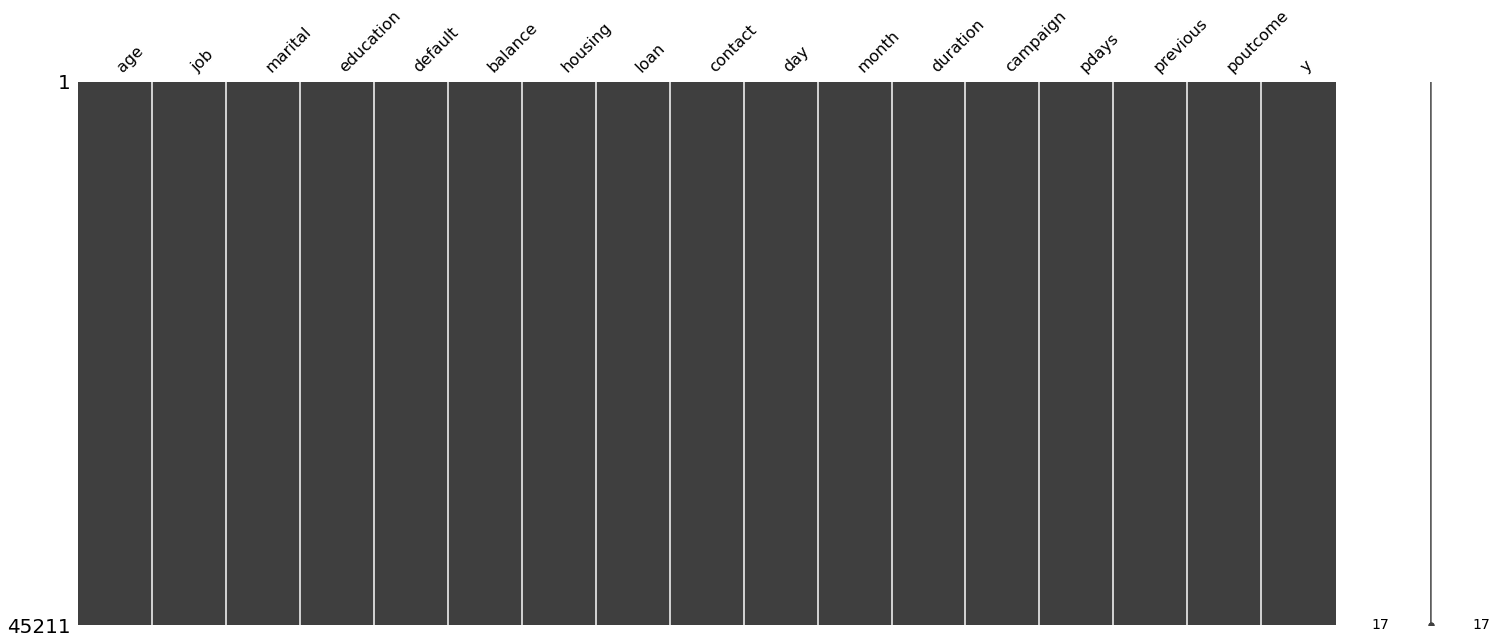

In [191]:
_ = msno.matrix(data)

In [192]:
list(data)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [193]:
# ommit 'day' because it is not significant 

categorical = ['job','marital','education','contact','poutcome','month']

binary = ['default','housing','loan']

continous = ['age','balance','campaign','pdays','previous','duration']

dummy_features = categorical + binary
target = ['y']

In [194]:
count_features = categorical + binary + continous + target
len(count_features)

16

In [195]:
for cat in categorical:
    values = data[cat].value_counts()
    print(values)

 blue-collar       9732
 management        9458
 technician        7597
 admin.            5171
 services          4154
 retired           2264
 self-employed     1579
 entrepreneur      1487
 unemployed        1303
 housemaid         1240
 student            938
 unknown            288
Name: job, dtype: int64
 married      27214
 single       12790
 divorced      5207
Name: marital, dtype: int64
 secondary     23202
 tertiary      13301
 primary        6851
 unknown        1857
Name: education, dtype: int64
 cellular      29285
 unknown       13020
 telephone      2906
Name: contact, dtype: int64
 unknown     36959
 failure      4901
 other        1840
 success      1511
Name: poutcome, dtype: int64
 may     13766
 jul      6895
 aug      6247
 jun      5341
 nov      3970
 apr      2932
 feb      2649
 jan      1403
 oct       738
 sep       579
 mar       477
 dec       214
Name: month, dtype: int64


C:\Users\oneseandunn\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  confint = []


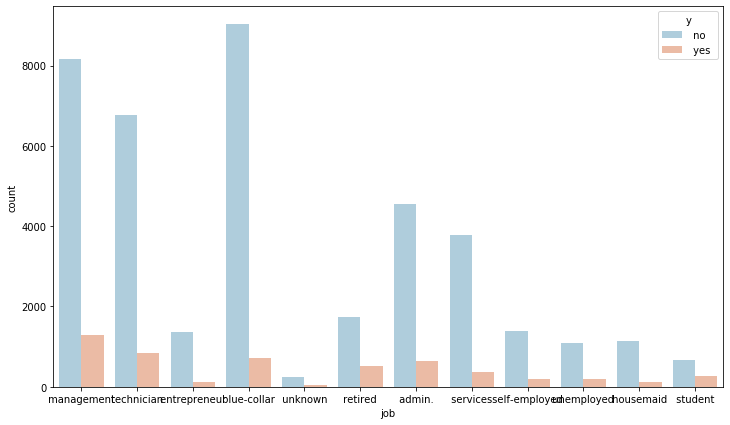

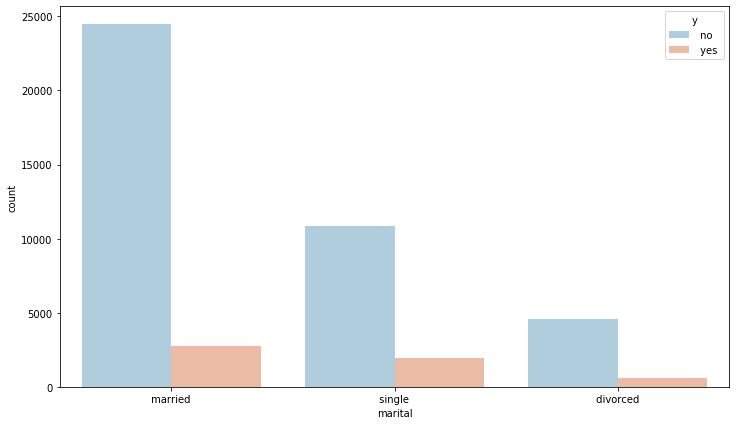

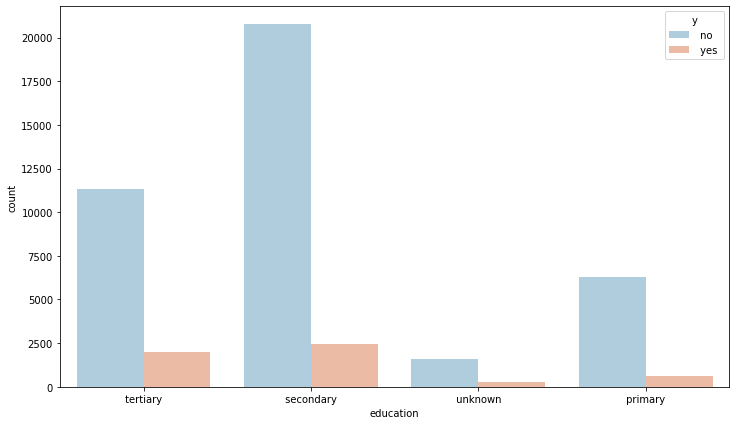

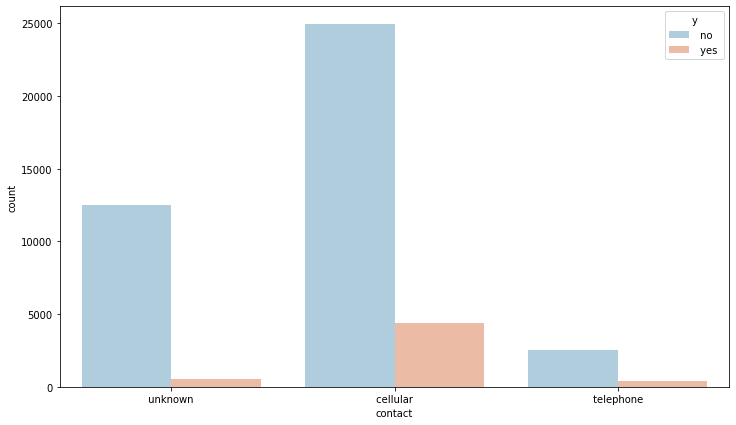

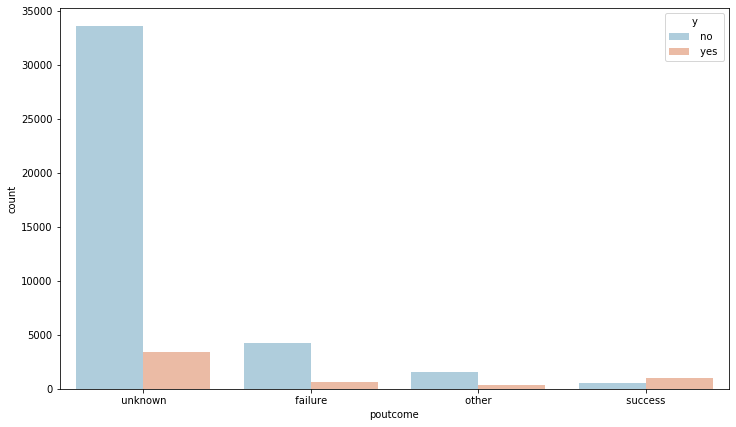

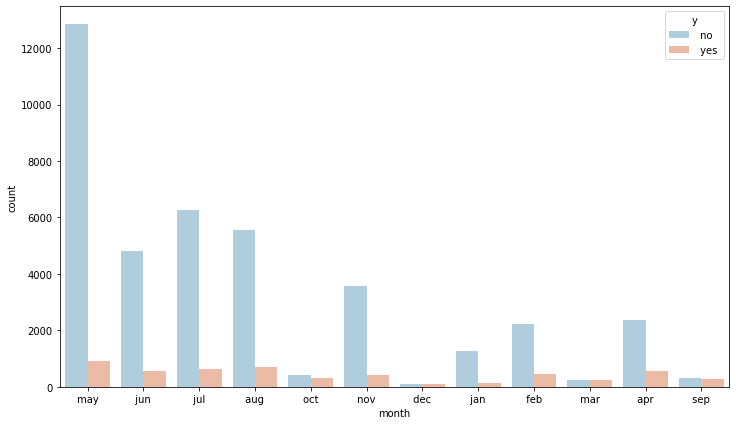

In [196]:
for cat in categorical:
    plt.figure(figsize=(12, 7))
    sns.countplot(x=cat, hue='y' , data=data,palette='RdBu_r')
    plt.show()

In [197]:
for bins in binary:
    values = data[bins].value_counts()
    print(values)

 no      44396
 yes       815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
 no      37967
 yes      7244
Name: loan, dtype: int64


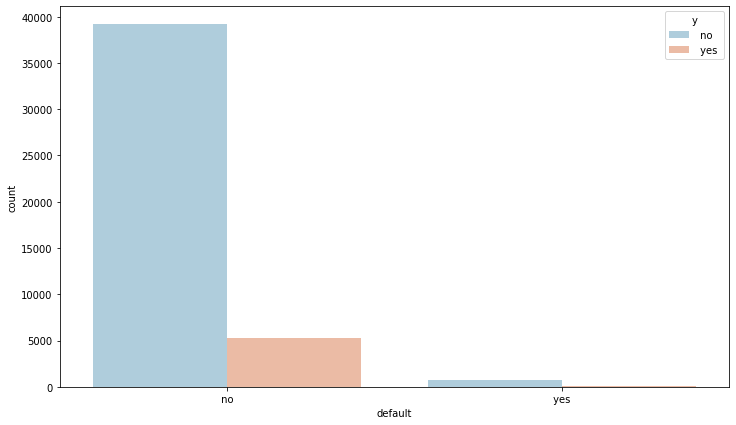

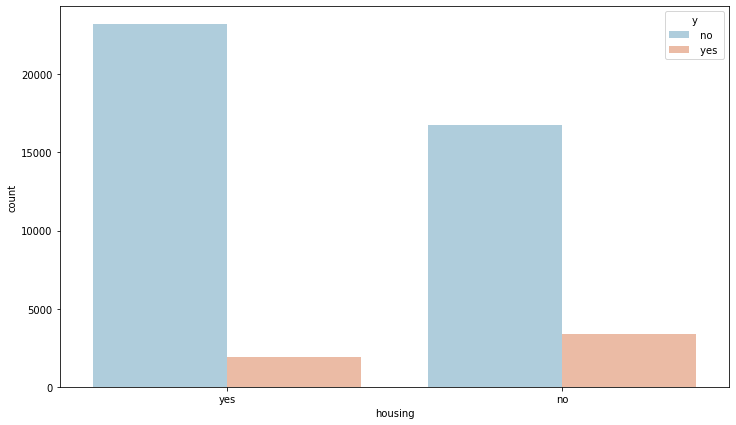

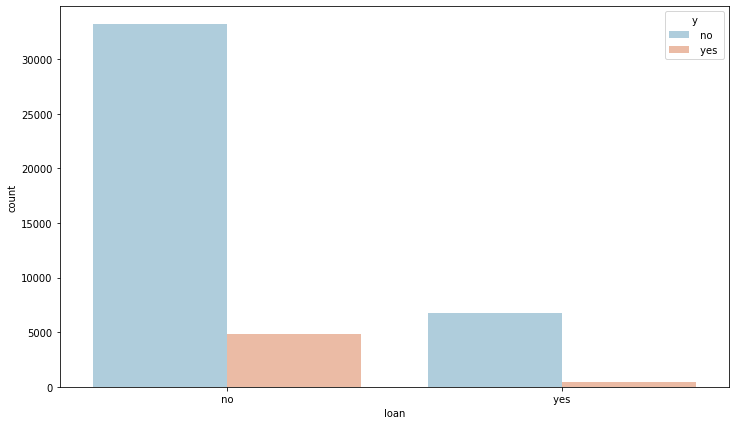

In [198]:
for bins in binary:
    plt.figure(figsize=(12, 7))
    sns.countplot(x=bins, hue='y' , data=data,palette='RdBu_r')
    plt.show()

In [199]:
data_dummies = pd.get_dummies(data[dummy_features],drop_first=True)

In [200]:
data.drop(dummy_features,inplace=True,axis=1)

In [201]:
data_2 = pd.concat([data,data_dummies],axis=1)

In [203]:
#list(data_2)

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'y',
 'job_ blue-collar ',
 'job_ entrepreneur ',
 'job_ housemaid ',
 'job_ management ',
 'job_ retired ',
 'job_ self-employed ',
 'job_ services ',
 'job_ student ',
 'job_ technician ',
 'job_ unemployed ',
 'job_ unknown ',
 'marital_ married ',
 'marital_ single ',
 'education_ secondary ',
 'education_ tertiary ',
 'education_ unknown ',
 'contact_ telephone ',
 'contact_ unknown ',
 'poutcome_ other ',
 'poutcome_ success ',
 'poutcome_ unknown ',
 'month_ aug ',
 'month_ dec ',
 'month_ feb ',
 'month_ jan ',
 'month_ jul ',
 'month_ jun ',
 'month_ mar ',
 'month_ may ',
 'month_ nov ',
 'month_ oct ',
 'month_ sep ',
 'default_ yes ',
 'housing_yes',
 'loan_ yes ']

In [270]:
X = data_2.drop(target,axis=1)
y = data_2[target]

In [285]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [277]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [278]:
predictions = logreg.predict(X_test)

In [279]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         no        0.91      0.98      0.94      7952
        yes        0.66      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [280]:
confusion_matrix(y_test,predictions)


array([[7761,  191],
       [ 724,  367]], dtype=int64)

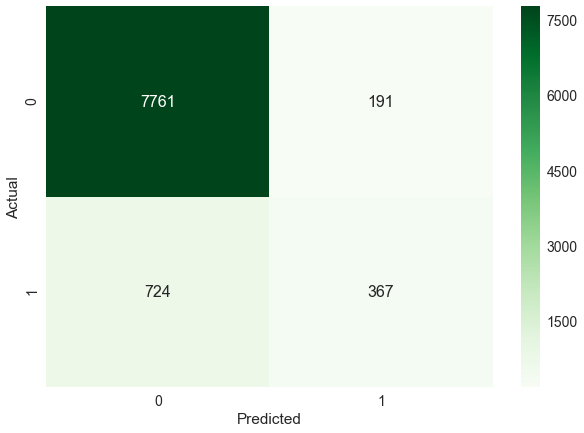

In [281]:
y_true = ["0", "1"]
y_pred = ["0", "1"]
data = confusion_matrix(y_test,predictions)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
_ = sns.heatmap(df_cm, cmap="Greens", annot=True,fmt='g',annot_kws={"size": 16})# font size

In [284]:
probs = logreg.predict_proba(y_test)

ValueError: could not convert string to float: ' no '

In [283]:
y_true = y_test
y_probas = predictions
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

C:\Users\oneseandunn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


IndexError: too many indices for array